In [1]:
from __future__ import print_function
__author__='Jianwei Li'

import numpy as np
import pylab as pl
%pylab inline

import seaborn as sn
from scipy.optimize import curve_fit, minimize



Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# list of distributions

dist = ['norm','pois','bino','chis','logi']

# set up a mean
mmean = 10.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


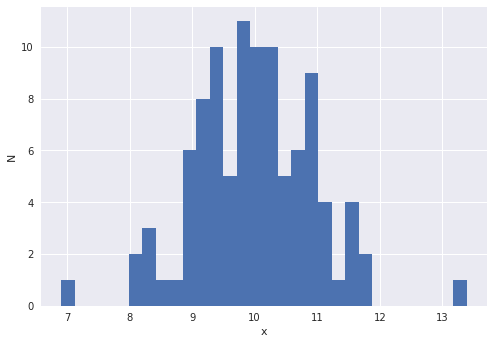

In [3]:
random.seed(666)
md = {}
md['norm'] = np.random.normal(mmean,size = 100)

pl.hist(md['norm'],bins=30)
pl.ylabel('N')
pl.xlabel('x')
pl.show()



In [4]:
# try to calculate what the mean and stdev of this distribution
print('Normal mean: %.2f, sample size: %d'%(md['norm'].mean(),len(md['norm'])))


Normal mean: 9.99, sample size: 100


In [19]:
# do it for 100 normal distributions


# np.array.astype(int)
mysize = (10+(np.array(range(0,100))*1990)/100+1).astype(int)
# print (len(mysize))

# write my dict with 5 different distribution
md['norm'] = {}
md['pois'] = {}
md['bino'] = {}
md['chis'] = {}
md['logi'] = {}


for n in mysize:
    md['norm'][n] = np.random.normal(mmean,size=n)
    md['pois'][n] = np.random.poisson(mmean,size=n)
    md['bino'][n] = np.random.binomial(n,mmean/n,size = n)
    md['chis'][n] = np.random.chisquare(mmean,size = n)
    md['logi'][n] = np.random.logistic(loc = mmean,size =n)

In [20]:
#  save the means for plots

md['norm']['means'] = {}
md['pois']['means'] = {}
md['bino']['means'] = {}
md['chis']['means'] = {}
md['logi']['means'] = {}


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


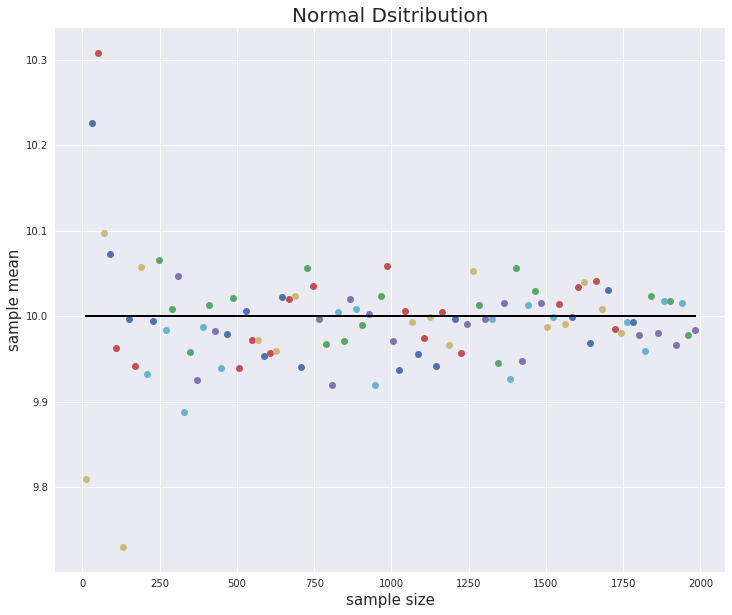

In [22]:
# plot normal distribution

ax_N = pl.figure(figsize = (12,10)).add_subplot(111)

for n in md['norm']:
    if not type(n) ==str:
        md['norm']['means'][n] = md['norm'][n].mean()
        # add plot it 
        
        ax_N.plot(n,md['norm']['means'][n],'o')
        ax_N.set_xlabel('sample size',fontsize = 15)
        ax_N.set_ylabel('sample mean',fontsize = 15)
        ax_N.set_title('Normal Dsitribution',fontsize = 20)
        ax_N.plot([min(mysize),max(mysize)],[mmean,mmean],'k')
        

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


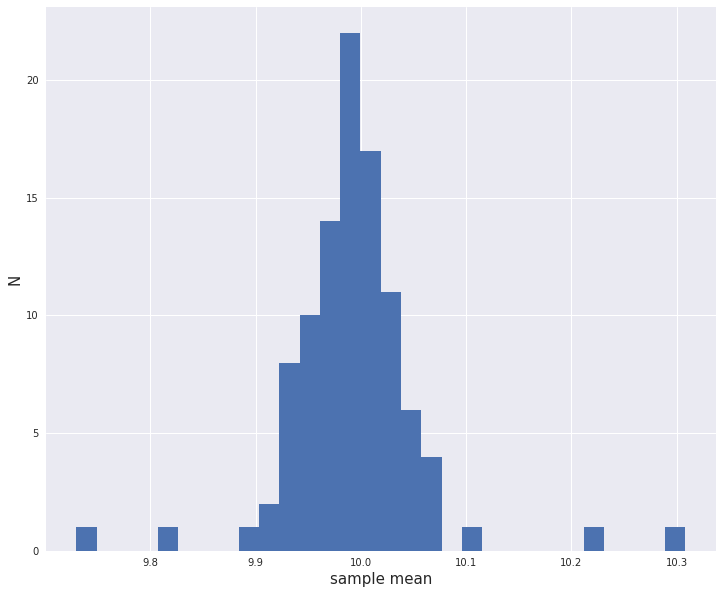

In [23]:
# mean of all samples in Normal Distribution

almeans_N = list(md['norm']['means'].values())
pl.figure(figsize=(12,10))
pl.hist(almeans_N,bins = 30)
pl.xlabel('sample mean',fontsize = 15)
pl.ylabel('N',fontsize = 15)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


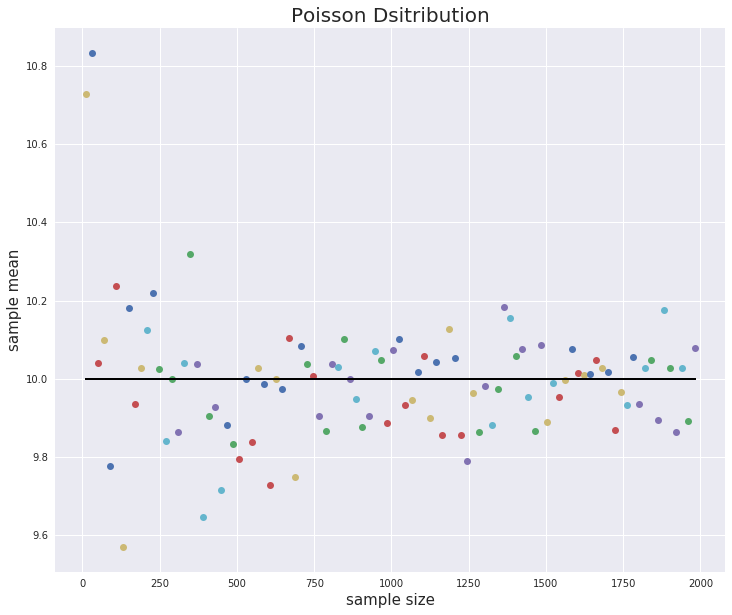

In [24]:

ax_P = pl.figure(figsize = (12,10)).add_subplot(111)

for n in md['pois']:
    if not type(n) ==str:
        md['pois']['means'][n] = md['pois'][n].mean()
        # add plot it 
        
        ax_P.plot(n,md['pois']['means'][n],'o')
        ax_P.set_xlabel('sample size',fontsize = 15)
        ax_P.set_ylabel('sample mean',fontsize = 15)
        ax_P.set_title('Poisson Dsitribution',fontsize = 20)
        ax_P.plot([min(mysize),max(mysize)],[mmean,mmean],'k')

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


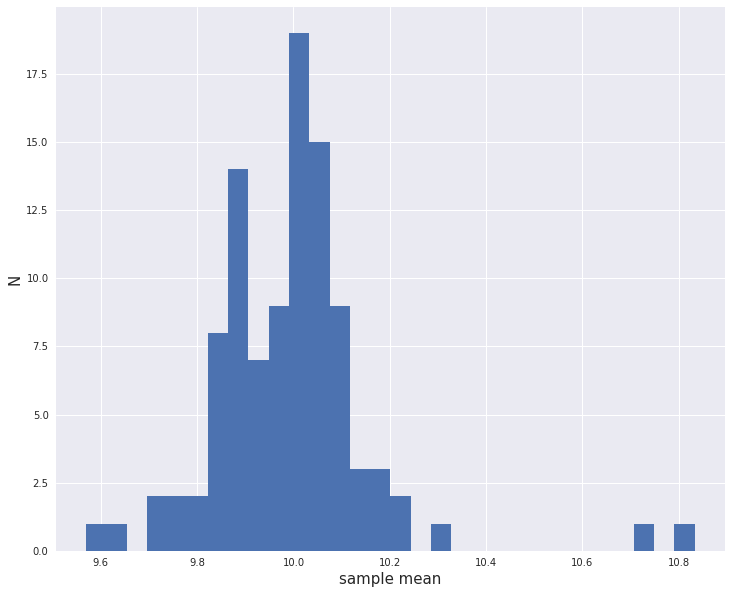

In [25]:
# plot all means in all samples in Poisson Distribution
allmeans_P = list(md['pois']['means'].values())
pl.figure(figsize = (12,10))
pl.hist(allmeans_P,bins =30)
pl.xlabel('sample mean',fontsize = 15)
pl.ylabel('N',fontsize = 15)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


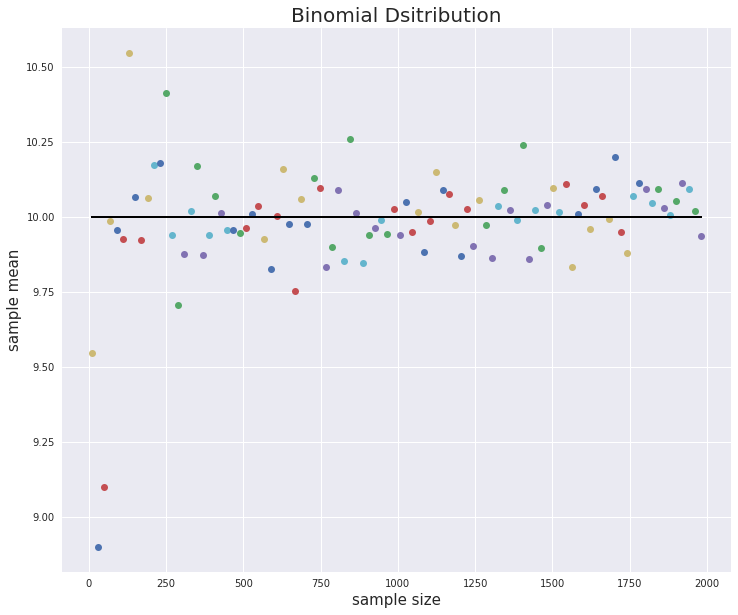

In [26]:

ax_B = pl.figure(figsize = (12,10)).add_subplot(111)

for n in md['bino']:
    if not type(n) ==str:
        md['bino']['means'][n] = md['bino'][n].mean()
        # add plot it 
        
        ax_B.plot(n,md['bino']['means'][n],'o')
        ax_B.set_xlabel('sample size',fontsize = 15)
        ax_B.set_ylabel('sample mean',fontsize = 15)
        ax_B.set_title('Binomial Dsitribution',fontsize = 20)
        ax_B.plot([min(mysize),max(mysize)],[mmean,mmean],'k')

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


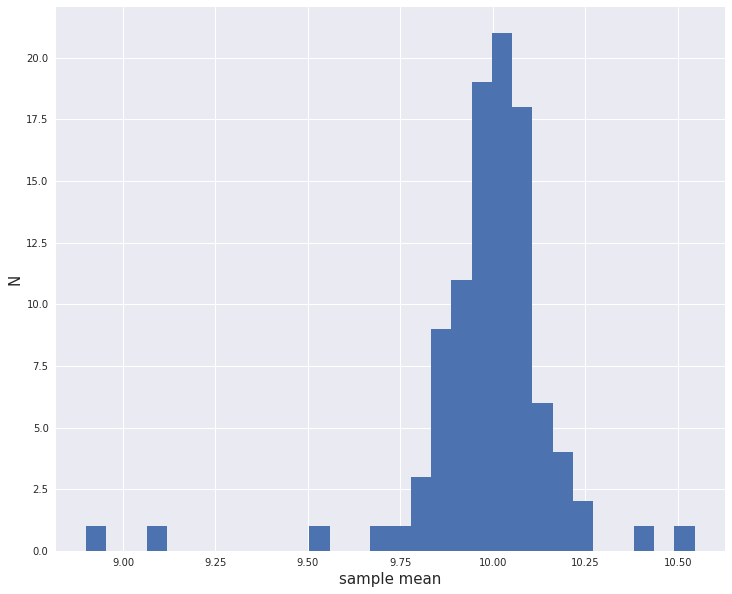

In [27]:
# plot all means in all samples in Binomial Distribution
allmeans_B = list(md['bino']['means'].values())
pl.figure(figsize = (12,10))
pl.hist(allmeans_B,bins =30)
pl.xlabel('sample mean',fontsize = 15)
pl.ylabel('N',fontsize = 15)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


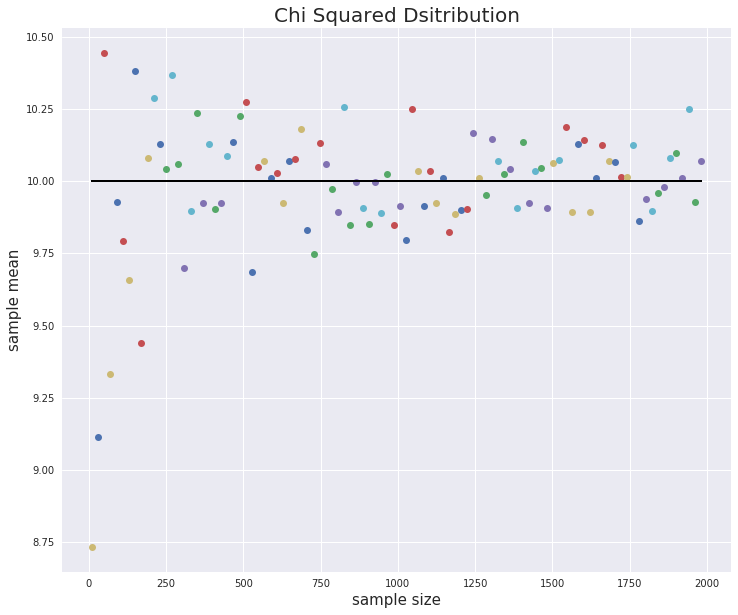

In [13]:

ax_C = pl.figure(figsize = (12,10)).add_subplot(111)

for n in md['chis']:
    if not type(n) ==str:
        md['chis']['means'][n] = md['chis'][n].mean()
        # add plot it 
        
        ax_C.plot(n,md['chis']['means'][n],'o')
        ax_C.set_xlabel('sample size',fontsize = 15)
        ax_C.set_ylabel('sample mean',fontsize = 15)
        ax_C.set_title('Chi Squared Dsitribution',fontsize = 20)
        ax_C.plot([min(mysize),max(mysize)],[mmean,mmean],'k')
    

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


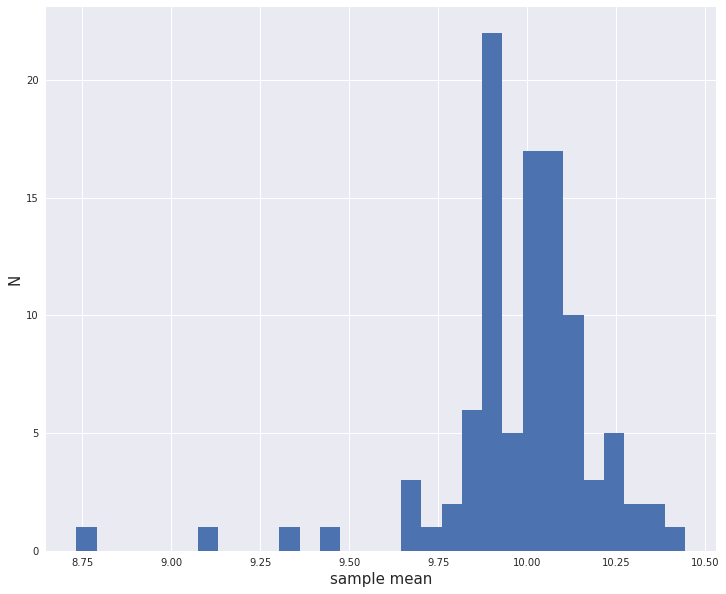

In [14]:
# plot all means in all samples in Chi Squared Distribution
allmeans_C = list(md['chis']['means'].values())
pl.figure(figsize(12,10))
pl.hist(allmeans_C,bins = 30)
pl.xlabel('sample mean',fontsize = 15)
pl.ylabel('N',fontsize = 15)
pl.title('Logistic Distribution',fontsize = 20)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


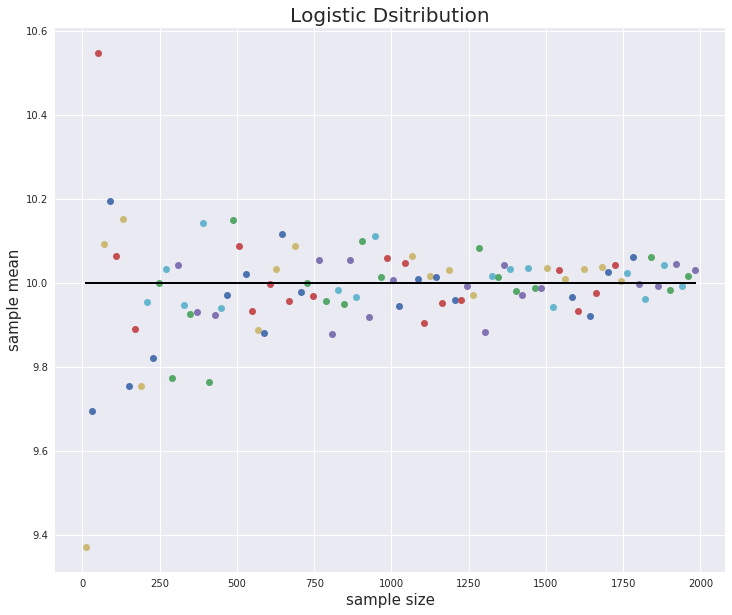

In [28]:

ax_L = pl.figure(figsize = (12,10)).add_subplot(111)

for n in md['logi']:
    if not type(n) ==str:
        md['logi']['means'][n] = md['logi'][n].mean()
        # add plot it 
        
        ax_L.plot(n,md['logi']['means'][n],'o')
        ax_L.set_xlabel('sample size',fontsize = 15)
        ax_L.set_ylabel('sample mean',fontsize = 15)
        ax_L.set_title('Logistic Dsitribution',fontsize = 20)
        ax_L.plot([min(mysize),max(mysize)],[mmean,mmean],'k')



Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


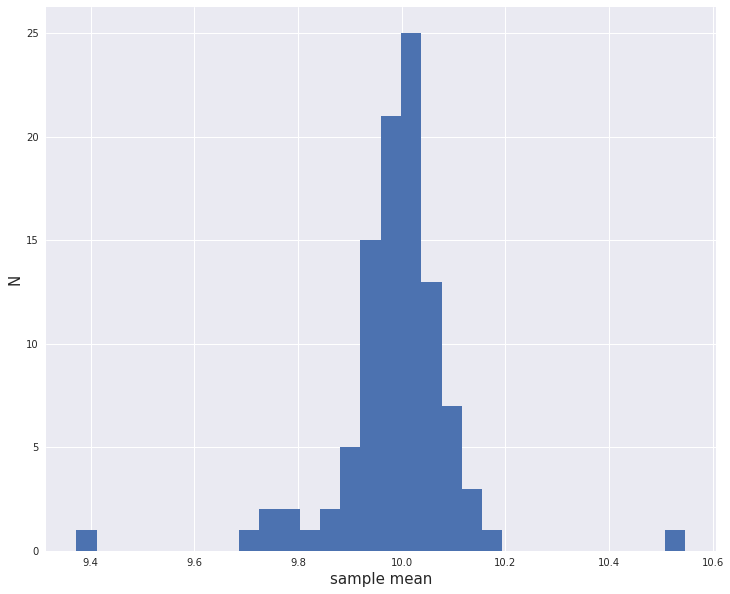

In [29]:
# plot all means in all samples in Log-normal Distribution
allmeans_N = list(md['logi']['means'].values())
pl.figure(figsize = (12,10))
pl.hist(allmeans_N,bins =30)
pl.xlabel('sample mean',fontsize = 15)
pl.ylabel('N',fontsize = 15)


##   Central limit theorem

####